# Mean Error Analysis

In [1]:
EXPORT_LATEX = False

%matplotlib inline 
# %matplotlib notebook would provide interactive plots

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from mthesis.helpers import *  # all functions are in this package

# DISPLAY CONFIGURATION
BP_OFFSETS = [0,0,0,0.15,0.25, 0.35, 0.40]
DEFAULT_LINE_PLOT_ARGS = {'kind':'line',
                          'marker':'o',
                          'markersize':6,
                          'color':colors}

pd.set_option('display.precision', 2,
              'display.width', 300,
              'display.chop_threshold', 0.0001,
              'display.expand_frame_repr', True,
              'display.max_rows', 55,
              'max_colwidth', 20,
              'display.float_format', float_fmt)

## All Data 

In [2]:
df = load_all_data()
dft = df

In [ ]:
print("SUMMARY:")
dft = df
summary = dft.groupby('n-sources').agg({'x1':'count', 'err-mean':np.mean, 'percent-matched':np.mean}).rename(columns={'x1':'n'})
print(summary.transpose())

if EXPORT_LATEX:
    summary.transpose().to_latex("".join([PATH_LATEX_TABLES, 'summary-all.tex']), column_format="rrrrrrr", bold_rows=True)

In [ ]:
print_summary(dft, verbose=False)
# print("OVERVIEW OF SAMPLE SIZES PER EVALUATION:")
# dfp = df.pivot_table("x1", index=["n-sources"], columns=["T60", "em", "reflect-order", "md", "SNR","wd","var-val","var-fixed"], aggfunc='count').transpose()
# print(dfp)

# plt.legend(fancybox=True, title=("T60","description"))

In [ ]:
ax, i = init_grid((1,2), (12,3))
cols = ['err-mean', 'percent-matched']
for col in cols:
    dft.pivot_table(col, index=['n-sources'], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
    style_line_plot("", "", grid='x', ax=ax[i])
    adjust_y_axis(0.1,1,0,1.01,ax[i])
    i+=1

## Fixed EM-Iterations

In [ ]:
df = load_all_data()
dft = df

In [3]:
# Manipulate Data
var = "em"
dft = df
dft = dft[dft["description"]=="em-iterations"]
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
# dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)

DATA FROM:  {'em-iterations'}
n-sources          2    3    4    5    6    7
n               1275 1275 1275 1275 1275 1275
em-iterations   7.61 7.61 7.61 7.61 7.61 7.61
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
prior              0    0    0    0    0    0
err-mean        0.14 0.23 0.32 0.39 0.48 0.46
percent-matched 0.78 0.72 0.68 0.62 0.57 0.47
NOTE: Data contains range of em (['1.0', '2.0', '3.0', '5.0', '10.0', '20.0'], n=[200, 200, 200, 200, 200, 275])



In [4]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
em                                     
1          200  200  200  200  200  200
2          200  200  200  200  200  200
3          200  200  200  200  200  200
5          200  200  200  200  200  200
10         200  200  200  200  200  200
20         275  275  275  275  275  275

MEAN ERROR:
n-sources    2    3    4    5    6    7
em                                     
1         0.19 0.37 0.48 0.50 0.65 0.60
2         0.17 0.23 0.39 0.47 0.52 0.50
3         0.14 0.22 0.29 0.43 0.46 0.44
5         0.12 0.20 0.25 0.36 0.46 0.44
10        0.13 0.20 0.25 0.30 0.39 0.43
20        0.09 0.18 0.27 0.32 0.44 0.40


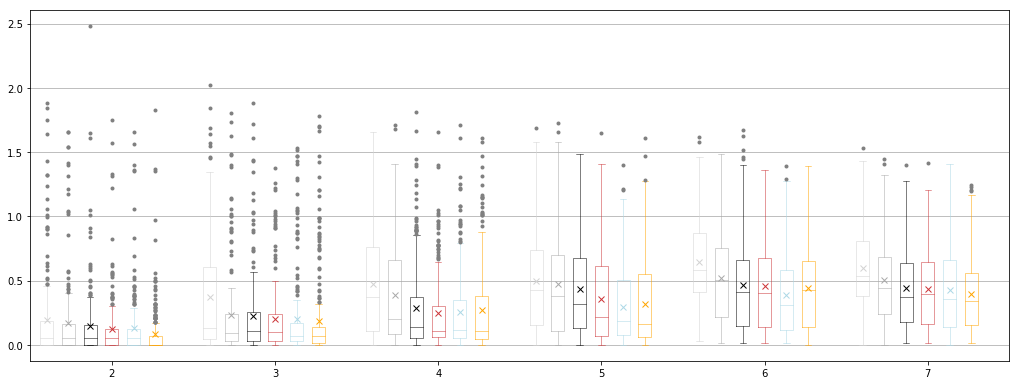

In [5]:
# Joint Boxplot, grouped
offset = 0.40
colors = ['lightgray', 'darkgray', 'k',lms_red, 'lightblue', 'orange']
offset_table = np.arange(-offset, offset, 2*offset/len(colors))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

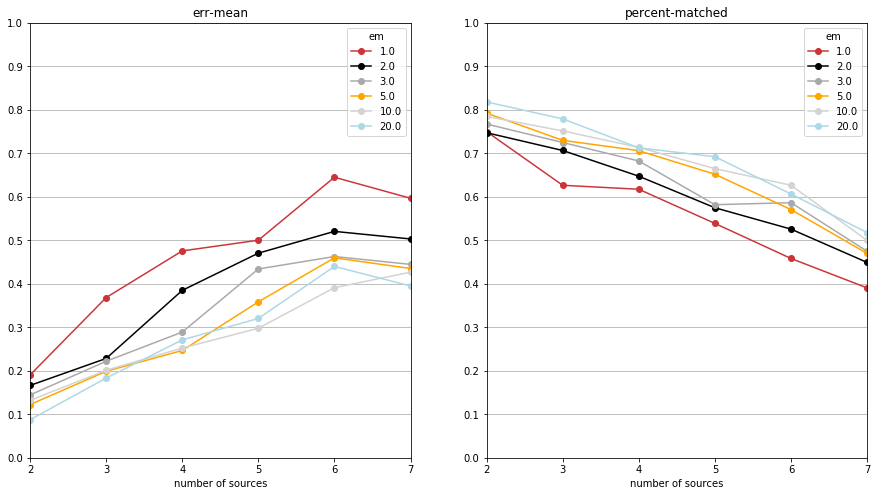

In [6]:
# Print Means in Lineplot
ax, i = init_grid((1,2),(15,8))
cols = ['err-mean', 'percent-matched']
axis_param = [[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for col in cols:
    a = dft.pivot_table(col, index=['n-sources'], columns=[var], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
#     a.set_ylim([0,1])
    style_line_plot("number of sources", "", grid='x', ax=ax[i])
    adjust_y_axis(*axis_param[i], a)
    i+=1
    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'lineplot-{}-{}.tex'.format(var, col)]))

## T60

In [ ]:
df = load_all_data()

In [ ]:
# Manipulate Data
var = "T60"
dft = df
dft = dft[dft["reflect-order"]==3]
# dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
# print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.25
colors = ['darkgray', 'k',lms_red, 'lightblue']
offset_table = np.arange(-offset, offset, 2*offset/len(colors))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
# Print Boxplots
ax, i = init_grid((1,len(dfp.index.values)),(17,6))
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    try:
        bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), showmeans=True, meanline=True, ax=ax[i])
        style_boxplot(bp)
        ax[i].set_title("{}={}".format(var,val))
        i+=1
    except ValueError:
        continue

In [ ]:
# Print Means in Lineplot
ax, i = init_grid((1,1),(6,6))
cols = ['err-mean']#, 'percent-matched']
axis_param = [[0.2, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for col in cols:
    a = dft.pivot_table(col, index=['n-sources'], columns=[var], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
#     a.set_ylim([0,1])
    style_line_plot("number of sources", "", grid='x', ax=ax[i])
    adjust_y_axis(*axis_param[i], a)
    i+=1
    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'plot_{}_{}.tex'.format(desc, col)]),
        figureheight = '\\figureheight',
        figurewidth = '\\figurewidth'
        )

# Min-Distance 

In [ ]:
df = load_all_data()

In [ ]:
var="md"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.0]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
# dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
# print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["md"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["md"], aggfunc='mean').transpose()
print(dfp)

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.25
colors = ['darkgray', 'k',lms_red, 'lightblue']
offset_table = np.arange(-offset, offset, 2*offset/len(colors))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
spgrid = (1,4)
plt.subplots(spgrid[0],spgrid[1], figsize=(17,5))
ax = list()
for i in range(1,spgrid[0]*spgrid[1]+1):
    ax.append(plt.subplot(spgrid[0],spgrid[1],i))

i=0
for md in [.1,.3,.5,1.]:
    dftt = dft[dft["md"]==md]
    try:
        bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), showmeans=True, meanline=True, ax=ax[i])
        style_boxplot(bp)
        ax[i].set_title("min-distance={}".format(md))
        i+=1
    except ValueError:
        continue

In [ ]:
spgrid = (1,2)
plt.subplots(spgrid[0],spgrid[1], figsize=(17,6))
ax = list()
for i in range(1,spgrid[0]*spgrid[1]+1):
    ax.append(plt.subplot(spgrid[0],spgrid[1],i))

i=0
desc = "md"
cols = ['err-mean', 'percent-matched']
axis_param = [[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for col in cols:
    a = dft.pivot_table(col, index=['n-sources'], columns=desc, aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
    a.set_ylim([0,1])
    style_line_plot("number of sources", "", grid='x', ax=ax[i])
    adjust_y_axis(*axis_param[i], a)
    i+=1
    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'plot_{}_{}.tex'.format(desc, col)]),
        figureheight = '\\figureheight',
        figurewidth = '\\figurewidth'
        )

# Reflect Order

In [ ]:
df = load_all_data()

In [ ]:
# Manipulate Data
var = "reflect-order"
dft = df
# dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.6]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
# print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["reflect-order"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["reflect-order"], aggfunc='mean').transpose()
print(dfp)

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
# Joint Boxplot, grouped
offset = 0.15
colors = ['darkgray', 'k',lms_red]
offset_table = np.linspace(-offset, offset, len(dfp.index.values))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in [1, 3, -1]:  # custom values to sort -1 as maximum value!
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((1,3),(17,5))
for val in [1., 3., -1.]:
    dftt = dft[dft[var]==val]
    try:
        bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), showmeans=True, meanline=True, ax=ax[i])
        style_boxplot(bp)
        ax[i].set_title("{}={}".format(var, val))
        i+=1
    except ValueError:
        continue

In [ ]:
ax, i = init_grid((1,2),(17,6))
desc = "reflect-order"
cols = ['err-mean', 'percent-matched']
axis_param = [[0.2, 0, 0, 2.01],[0.1, 0, 0,1.01]]
for col in cols:
    a = dft.pivot_table(col, index=['n-sources'], columns=['reflect-order'], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
#     a.set_ylim([0,1])
    style_line_plot("number of sources", "", grid='x', ax=ax[i])
    adjust_y_axis(*axis_param[i], a)
    i+=1
    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'plot_{}_{}.tex'.format(desc, col)]),
        figureheight = '\\figureheight',
        figurewidth = '\\figurewidth'
        )

## SNR

In [ ]:
df = load_all_data()

In [ ]:
var = "SNR"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
# dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]=="noise"]
print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
# Joint Boxplot, grouped
offset = 0.25
colors = ['darkgray', 'k',lms_red, 'lightblue',"orange"]
offset_table = np.linspace(-offset, offset, len(dfp.index.values))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}
for val in [0,30,15,10,5]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((1,5),(17,4))
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    try:
        bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), showmeans=True, meanline=True, ax=ax[i])
        style_boxplot(bp)
        ax[i].set_title("{}={}".format(var,val))
        i+=1
    except ValueError:
        continue

In [ ]:
ax, i = init_grid((1,2),(17,6))
cols = ['err-mean', 'percent-matched']
axis_param = [[0.2, 0, 0, 2.01],[0.1, 0, 0,1.01]]
for col in cols:
    a = dft.pivot_table(col, index=['n-sources'], columns=[var], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
#     a.set_ylim([0,1])
    style_line_plot("number of sources", "", grid='x', ax=ax[i])
#     adjust_y_axis(*axis_param[i], a)
    i+=1
    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'plot_{}_{}.tex'.format(desc, col)]),
        figureheight = '\\figureheight',
        figurewidth = '\\figurewidth'
        )

## Guessing at random

In [ ]:
dft = matlab2pandas(dirname='_guessing', save_to=path.join(PATH_ROOT, '_guessing'), summary=False)

In [ ]:
dft = dft[dft['description'].isin(['_guessing', 'base'])]
print_summary(dft)
dfp = dft.pivot_table("err-mean", index="description", columns="n-sources", aggfunc='mean').transpose()
dfp.plot(kind='line', marker='o', color=[lms_red, "darkgray", "lightgray", "orange", "black"])

style_line_plot(xlabel="number of sources", ylabel="mean localisation error [m]", grid="y")

# Wall distance

In [ ]:
df = load_all_data()
dft = df

In [ ]:
var = "wd"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
# dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
# dfp = df.pivot_table("err-mean", index=["description", "wd"], columns="n-sources", aggfunc='mean').transpose()
# dfp.boxplot(column=("n-sources"))

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.15
colors = ['darkgray', 'k',lms_red, 'lightblue']
offset_table = np.linspace(-offset, offset, len(dfp.index.values))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((1,3), (17,8))
for val in [1.2, 1.3, 1.5]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), ax=ax[i],showmeans=True, meanline=True)
    style_boxplot(bp)
    ax[i].set_title("Wall distance = {}m".format(val))
    i+=1

In [ ]:
ax, i = init_grid((2,2),(17,17))
cols = ['err-mean', 'percent-matched']
axis_param = [[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for vf in [1, 0]:
    dftt = dft[dft["var-fixed"]==vf]
    for col in cols:
        a = dftt.pivot_table(col, index=['n-sources'], columns=['var-val', 'var-fixed'], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i], title=col)
        a.set_ylim([0,1])
        style_line_plot("number of sources", "", grid='x', ax=ax[i])
        adjust_y_axis(*axis_param[i], a)
        i+=1
        if EXPORT_LATEX:
            tikz_save("".join([PATH_LATEX_PLOTS, 'plot_{}_{}.tex'.format(desc, col)]),
            figureheight = '\\figureheight',
            figurewidth = '\\figurewidth'
            )

# Best Case Scenario vs. Worst Case Scenario

In [ ]:
df = load_all_data()
dft = df.copy()

In [ ]:
var = "wd"
dfts = []

print("BEST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==0]
dft = dft[dft["T60"]==0.0]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.5]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("BASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("WORST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==-1]
dft = dft[dft["T60"]==0.9]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==5]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("GUESSING:")
dft = matlab2pandas(dirname='_guessing', save_to=path.join(PATH_ROOT, '_guessing'), summary=True)
dfts.append(dft)

In [ ]:
# Joint Boxplot, grouped
offset = 0.15
colors = ['darkgray', 'k',lms_red, 'lightblue']
offset_table = np.linspace(-offset, offset, 4)
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for dft in dfts:
    dftt = dft
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args)
    legend_dict["em={}".format(int(val))] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
    
# plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
# adjust axis to larger values of guessing and worst case scenario
ax.set_ylim([0,3.51])
ax.set_yticks(np.arange(0,3.51,0.25))

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-best-case.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((1,4), (17,7))
desc = ['best case', 'base', 'worst case', 'guessing']
for dft in dfts:
    dftt = dft
    bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), ax=ax[i],showmeans=True, meanline=True)
    style_boxplot(bp)
    adjust_y_axis(0.25,2,0,3.51,ax[i])
    ax[i].set_title("{}".format(desc[i]))
    i+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-seperate-cases.tex'.format(var)]), strict=True, wrap=False)

# Variance Analysis

In [ ]:
# Load Data
df = load_all_data()
dft = df.copy()

In [ ]:
# Manipulate Data
dft = df.copy()
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==10]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
print_summary(dft)

In [ ]:
# Sample Sizes
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["var-val","var-fixed"], aggfunc='count').transpose()
print(dfp)
init_vars = set([x[0] for x in dfp.index.values])
var_fixed = set([x[1] for x in dfp.index.values])
# print(var_fixed)
# print()

evals = sorted(itertools.product(var_fixed, init_vars))
for e in evals: print(e)

In [ ]:
# dfp = df.pivot_table("err-mean", index=["description", "wd"], columns="n-sources", aggfunc='mean').transpose()
# dfp.boxplot(column=("n-sources", "var", "var-val"))
ax, i = init_grid((2,6),(17,8))

for vf, vv in comb:
    dftt = dft[dft["var-val"]==vv]
    dftt = dftt[dftt["var-fixed"]==vf]
    try:
        bp = dftt.boxplot('err-mean', by=["n-sources"], return_type='both', figsize=(6,  6), showmeans=True, meanline=True, ax=ax[i])
        style_boxplot(bp)
        ax[i].set_title("var-fixed={}, var-val={}".format(vf, vv))
        i+=1
    except ValueError:
        continue
    

In [ ]:
var = 'var-val'
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.30
colors = ['darkgray', 'k',lms_red, 'lightblue', 'orange', 'lightgray']
offset_table = np.linspace(-offset, offset, 6)
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict={}
print(sorted(init_vars))
for val in sorted(init_vars):
    dftt = dft[dft[var]==val]
    dftt = dftt[dftt['var-fixed']==1]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args)
    legend_dict["$\sigma^2$={}".format(val)] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# ax.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
var = 'var-val'
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.30
colors = ['darkgray', 'k',lms_red, 'lightblue', 'orange', 'lightgray']
offset_table = np.linspace(-offset, offset, 6)
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict={}
print(sorted(init_vars))
for val in sorted(init_vars):
    dftt = dft[dft[var]==val]
    dftt = dftt[dftt['var-fixed']==0]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args)
    legend_dict["$\sigma^2$={}".format(val)] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
# ax.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}-est.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((2,2),(17,17))
cols = ['err-mean', 'percent-matched']
axis_param = [[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01],[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for vf in [1, 0]:
    dftt = dft[dft["var-fixed"]==vf]
    for col in cols:
        a = dftt.pivot_table(col, index=['n-sources'], columns=['var-val', 'var-fixed'], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i])
        ax[i].legend_.remove()
        a.set_ylim([0,1])
        style_line_plot("", "", grid='x', ax=ax[i])
        adjust_y_axis(*axis_param[i], a)
        i+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'plot-variance-fixed.tex']),
    figureheight = '\\figureheight',
    figurewidth = '\\figurewidth'
    )

# Implementierung von $\psi_{s}$ 

In [ ]:
# Load Data
df = load_all_data()
dft = df.copy()

In [ ]:
# Manipulate Data
var = 'prior'
dft = df.copy()
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
# dft = dft[dft["prior"]=='equal']
print_summary(dft)

In [ ]:
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
offset = 0.15
colors = ['darkgray', 'k',lms_red, 'lightblue']
offset_table = np.linspace(-offset, offset, len(dfp.index.values))
fig = figure( figsize=(17,6.5) )
ax  = fig.add_subplot(111)
boxplot_args = {'ax':ax,'notch':False,'return_type':'both','widths':0.08,'sym':'','showmeans':True, 'meanline':False}
idx=0
legend_dict = {}

for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], **boxplot_args, whiskerprops = WHISKER_PROPS)
    legend_dict["prior={}".format(val)] = Patch(color=colors[idx])
    style_boxplot(bp, None, colors[idx])
    boxlines = bp["err-mean"][1]
    for el in boxlines:
        setp(boxlines[el], color=colors[idx],linewidth=0.5)  # this styles elements not in box
        for el2 in boxlines[el]:
            line = el2
            setp(line, xdata=getp(line, 'xdata')+offset_table[idx])
    idx+=1
plt.legend(list(legend_dict.values()), list(legend_dict.keys()))  # Legend is added in LaTeX!
# if EXPORT_LATEX:
#     tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Analyse DataFrame

### Examine Outliers

In [ ]:
# print(pd.concat([df[df["err-mean"]>=1.5].loc[:, "err1":"err7"], df[df["err-mean"]>=1.5].loc[:, "x1":"x7"]], axis=1))
print("ERRORS:\n{}\n".format(df[df["err-mean"]>=1.5].loc[:, "err1":"err7"]))
print("X-COORDINATES:\n{}\n".format(df[df["err-mean"]>=1.5].loc[:, "x1":"x7est"]))
print("Y-COORDINATES:\n{}\n".format(df[df["err-mean"]>=1.5].loc[:, "y1":"y7est"]))

In [ ]:
# Box Plot
bp = df.boxplot('err-mean', by=["n-sources", "refl-ord"], return_type='both',figsize=(17,  12), showmeans=True, meanline=True)
style_boxplot(bp)

if EXPORT_LATEX:
    tikz_save(PATH_BOX_PLOT, show_info=False)

# Perfect Match Analysis

In [ ]:
dfcp = df.pivot_table("percent-matched", columns="refl-ord", aggfunc='mean').transpose()
dfcp.plot(**DEFAULT_LINE_PLOT_ARGS)
# Style plot
style_line_plot(xlabel="number of sources", ylabel="perfect matches", grid="y")

# Significance Analysis

In [ ]:
from scipy.stats import ttest_ind, describe, norm
from statsmodels.formula.api import ols

means = []
stddevs = []

# extract err-mean per n_sources
cat = {}
for n in set(df["n-sources"].values):
    cat[str(n)] = df[df['n-sources']==n]['err-mean']

x = np.linspace(0,1.5,100)
print("DESCRIPTIVE ANALYSIS:")
fig, ax = plt.subplots(1,3, figsize=(17,  6))
for n, c in cat.items():
    dr = describe(c)
    means.append(dr.mean)
    stddevs.append(np.sqrt(dr.variance))
    y = norm.pdf(x, loc=dr.mean, scale=np.sqrt(dr.variance))
    plt.subplot(131)
    plt.plot(x, y, label=n)  # plot gaussian
    print("{} sources: n={:3}, min={:0.3f}, max={:0.3f}, mean={:0.3f}, variance={:0.3f}, std.dev={:0.3f}".format(
        n, dr.nobs, dr.minmax[0], dr.minmax[1], dr.mean, dr.variance, np.sqrt(dr.variance)))
plt.legend()

plt.subplot(132)
plt.boxplot(list(cat.values()), showmeans=True, meanline=True)

plt.subplot(133)
plt.boxplot(list(cat.values()), showmeans=True, meanline=True)
plt.ylim(-0.01, 0.31)
plt.yticks([0, 0.1, 0.2, 0.3])

# This means that given p and t values from a two-tailed test, you would reject the null hypothesis 
# of a greater-than test when p/2 < alpha and t > 0, and of a less-than test when p/2 < alpha and t < 0.    

print("\nT-TEST FOR DIFFERENCE IN MEANS:")
for i1 in set(df["n-sources"].values):
    for i2 in set(df["n-sources"].values):
        if i1!=i2 and i2>i1 and i2<=i1+1:
            ttest = ttest_ind(cat[str(i2)], cat[str(i1)], equal_var=False)
            p_onesided = ttest.pvalue/2
            if p_onesided <= 0.01:sign="***"
            elif p_onesided <= 0.05: sign="**"
            elif p_onesided <= 0.10: sign="*"
            else: sign="(n.s.)"
            print("{}x{}: t={t.statistic:0.3f}, p={p:0.3f} {s:^6}".format(i1, i2, t=ttest, p=p_onesided, s=sign))

print("\nVISUALIZE MEANS AND VARIANCE OF DATA:")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

x = np.linspace(0, 1)
p1, = plt.plot(x, np.cos(x))

